In [5]:
import pandas as pd

# Load the Iris dataset from your CSV file
df = pd.read_csv("IRIS.csv")

# Filter out rows where Species is "virginica"
df = df[df['species'] != 'Iris-virginica']

# Convert the 'Species' column to a categorical factor
df['species'] = pd.Categorical(df['species'])

# Display the first few rows of the DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Convierta las petal_width columnas en una variable categórica

Hay varias formas de convertir una variable continua en una variable categórica. Antes de hacer eso, veamos algunas estadísticas descriptivas de esta variable.
Hay un total de 100 observaciones.
El rango de estas observaciones es de 0,1 a 1,8.
A continuación se muestra el resumen

In [10]:
# Summary of the 'Petal.Width' column
petal_width_summary = df['petal_width'].describe()
print(petal_width_summary)

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64


In [12]:
import numpy as np
# Create categorical bins for Petal.Width
petal_width_bins = np.quantile(df['petal_width'], q=np.arange(0, 1.1, 0.5))
petal_width_labels = ["Below", "Above"]
df['Petal.Width.Cat'] = pd.cut(df['petal_width'], bins=petal_width_bins, labels=petal_width_labels, include_lowest=True)

# Display the first few rows of the modified DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

  Petal.Width.Cat  
0           Below  
1           Below  
2           Below  
3           Below  
4           Below  


# Soltar petal_width columna

In [14]:
# Drop the 'Petal.Width' column
df = df.drop(columns=['petal_width'])

# Display the first few rows of the modified DataFrame
print(df.head())

   sepal_length  sepal_width  petal_length      species Petal.Width.Cat
0           5.1          3.5           1.4  Iris-setosa           Below
1           4.9          3.0           1.4  Iris-setosa           Below
2           4.7          3.2           1.3  Iris-setosa           Below
3           4.6          3.1           1.5  Iris-setosa           Below
4           5.0          3.6           1.4  Iris-setosa           Below


# Species contra Petal.Width.Cat

Veamos si hay alguna interacción entre Speciesy Petal.Width.Cat. Dado que estas dos son variables categóricas, utilizaremos una prueba de chi-cuadrado . El punto de partida es echar un vistazo a la tabla de contingencia.

In [16]:
# Create a contingency table
contingency_table = pd.crosstab(df['Petal.Width.Cat'], df['species'])

# Display the contingency table
print(contingency_table)

species          Iris-setosa  Iris-versicolor  Iris-virginica
Petal.Width.Cat                                              
Below                     50               28               0
Above                      0               22              50


Para realizar la chi-squareprueba asumiremos la hipótesis nula de la siguiente manera:

H0 : Petal.Width.CatNo tiene ningún efecto sobre elSpecies

En consecuencia, las hipótesis alternativas se definirán de la siguiente manera:

Ha : Petal.Width.CatTiene algún efecto en elSpecies

Realizaremos la prueba usando chisq.test

In [18]:
from scipy.stats import chi2_contingency

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared: 100.64102564102565
P-value: 1.3998417931687032e-22
Degrees of freedom: 2
Expected frequencies: [[26. 26. 26.]
 [24. 24. 24.]]


Como podemos ver en los resultados anteriores, es p-value1,125856510^{-22}, que es bastante menor que el valor umbral de 5%. Esto nos permite rechazar con seguridad la hipótesis nula y aceptar la hipótesis alternativa. En otras palabras, Petal.Width.Cattiene un impacto Speciesque nos permite concluir que Petal.Width.Cates un buen predictor de Species.

# Species contra sepal_length

Ahora, exploraremos el replatio entre Speciesy Sepal.Length. Una es una variable categórica y la otra es una variable continua. Para tener una idea rápida de si uno afecta al otro, podemos mirar el diagrama de caja.

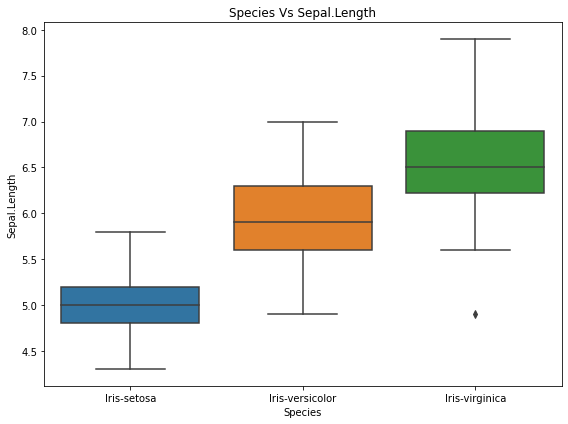

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title("Species Vs Sepal.Length")
plt.xlabel("Species")
plt.ylabel("Sepal.Length")
plt.tight_layout()
plt.show()

Como los diagramas de caja están claramente separados sin superposición, podemos inferir que Sepal.Length pueden estimar de manera justa el Species. Corroboremos esto con un simplet.test

Para la prueba a continuación se presentan las hipótesis:

Hipótesis nula H0 : Sepal.Length no afecta a Species. Es decir que la diferencia entre los Sepal.Length valores observados para varios Species no son estadísticamente diferentes

Hipótesis alternativa Ha : Sepal.Length tiene algún efecto sobre Species. Es decir, la diferencia entre los Sepal.Length valores observados para varios Species son de hecho diferentes entre sí.

In [30]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the Iris dataset from your CSV file
df = pd.read_csv("IRIS.csv")

# Extract Sepal.Length for "setosa" and "versicolor"
x = df[df['species'] == 'Iris-setosa']['sepal_length']
y = df[df['species'] == 'Iris-versicolor']['sepal_length']

# Check for missing data
if x.isnull().any() or y.isnull().any():
    print("Missing data found. Please handle missing values.")
else:
    # Perform the t-test
    t_statistic, p_value = ttest_ind(x, y, equal_var=False)

    # Display the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)


T-statistic: -10.52098626754911
P-value: 3.746742613983842e-17


Como podemos observar en los resultados anteriores, p=value3.746742610^{-17} es significativamente menor que nuestro umbral del 5%. Por tanto, podemos rechazar la hipótesis nula y aceptar la alternativa.

Según la hipótesis alternativa, Sepal.Length los valores de varios Species son estadísticamente diferentes entre sí, es decir, los valores están claramente separados entre diferentes clases de Species. Por tanto Sepal.Length puede ser un buen predictor.